In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import lasio
%matplotlib inline
plt.style.use('seaborn-white')


In [39]:
LAS = lasio.read("1046139243.las")
for curve in LAS.curves:
    print("%s\t[%s]\t%s\t%s" % (
         curve.mnemonic, curve.unit, curve.value, curve.descr))

DEPT	[FT]	0 000 00 00	Depth
ABHV	[FT3]	0	Annular Borehole Volume
CNPOR	[PU]	0	CN Selected Porosity
DCAL	[IN]	0	Caliper from Density Tool
DPOR	[PU]	0	Density Porosity
GR	[GAPI]	0	Gamma Ray
RHOB	[G/CC]	0	Bulk Density
RHOC	[G/CC]	0	Density Correction
RILD	[OHM-M]	0	DIL Deep Resistivity
RILM	[OHM-M]	0	DIL Medium Resistivity
RLL3	[OHM-M]	0	DIL Shallow Resistivity
RxoRt	[]	0	Rxo / Rt
SP	[MV]	0	DIL Spontaneous Potential
TBHV	[FT3]	0	Borehole Volume
MEL15	[OHM-M]	0	Microlog
MEL20	[OHM-M]	0	Microlog
DT	[USEC/FT]	0	Delta Time
ITT	[MSEC]	0	Integrated Travel Time Blips
MELCAL	[IN]	0	Micro Caliper
SPOR	[PU]	0	Sonic Porosity


In [40]:
LASlog = LAS.df()
#LASlog.head()
#LASlog.describe()
#LAS.well

In [41]:
upper_d = 3400
lower_d = 4200

lower_rhob = 1.95
upper_rhob = 2.95

lower_phi = -15
upper_phi = 45

upper_gr = 175
lower_gr = 0

upper_dt = 140
lower_dt = -200

LAS['SS_ex'] = 2.45
LAS['LS_ex'] = 2.71
LAS['DL_ex'] = 2.85
LAS['Salt_ex'] = 2.3

LAS['GR_Dirty'] = 110
LAS['GR_Clean'] = 20

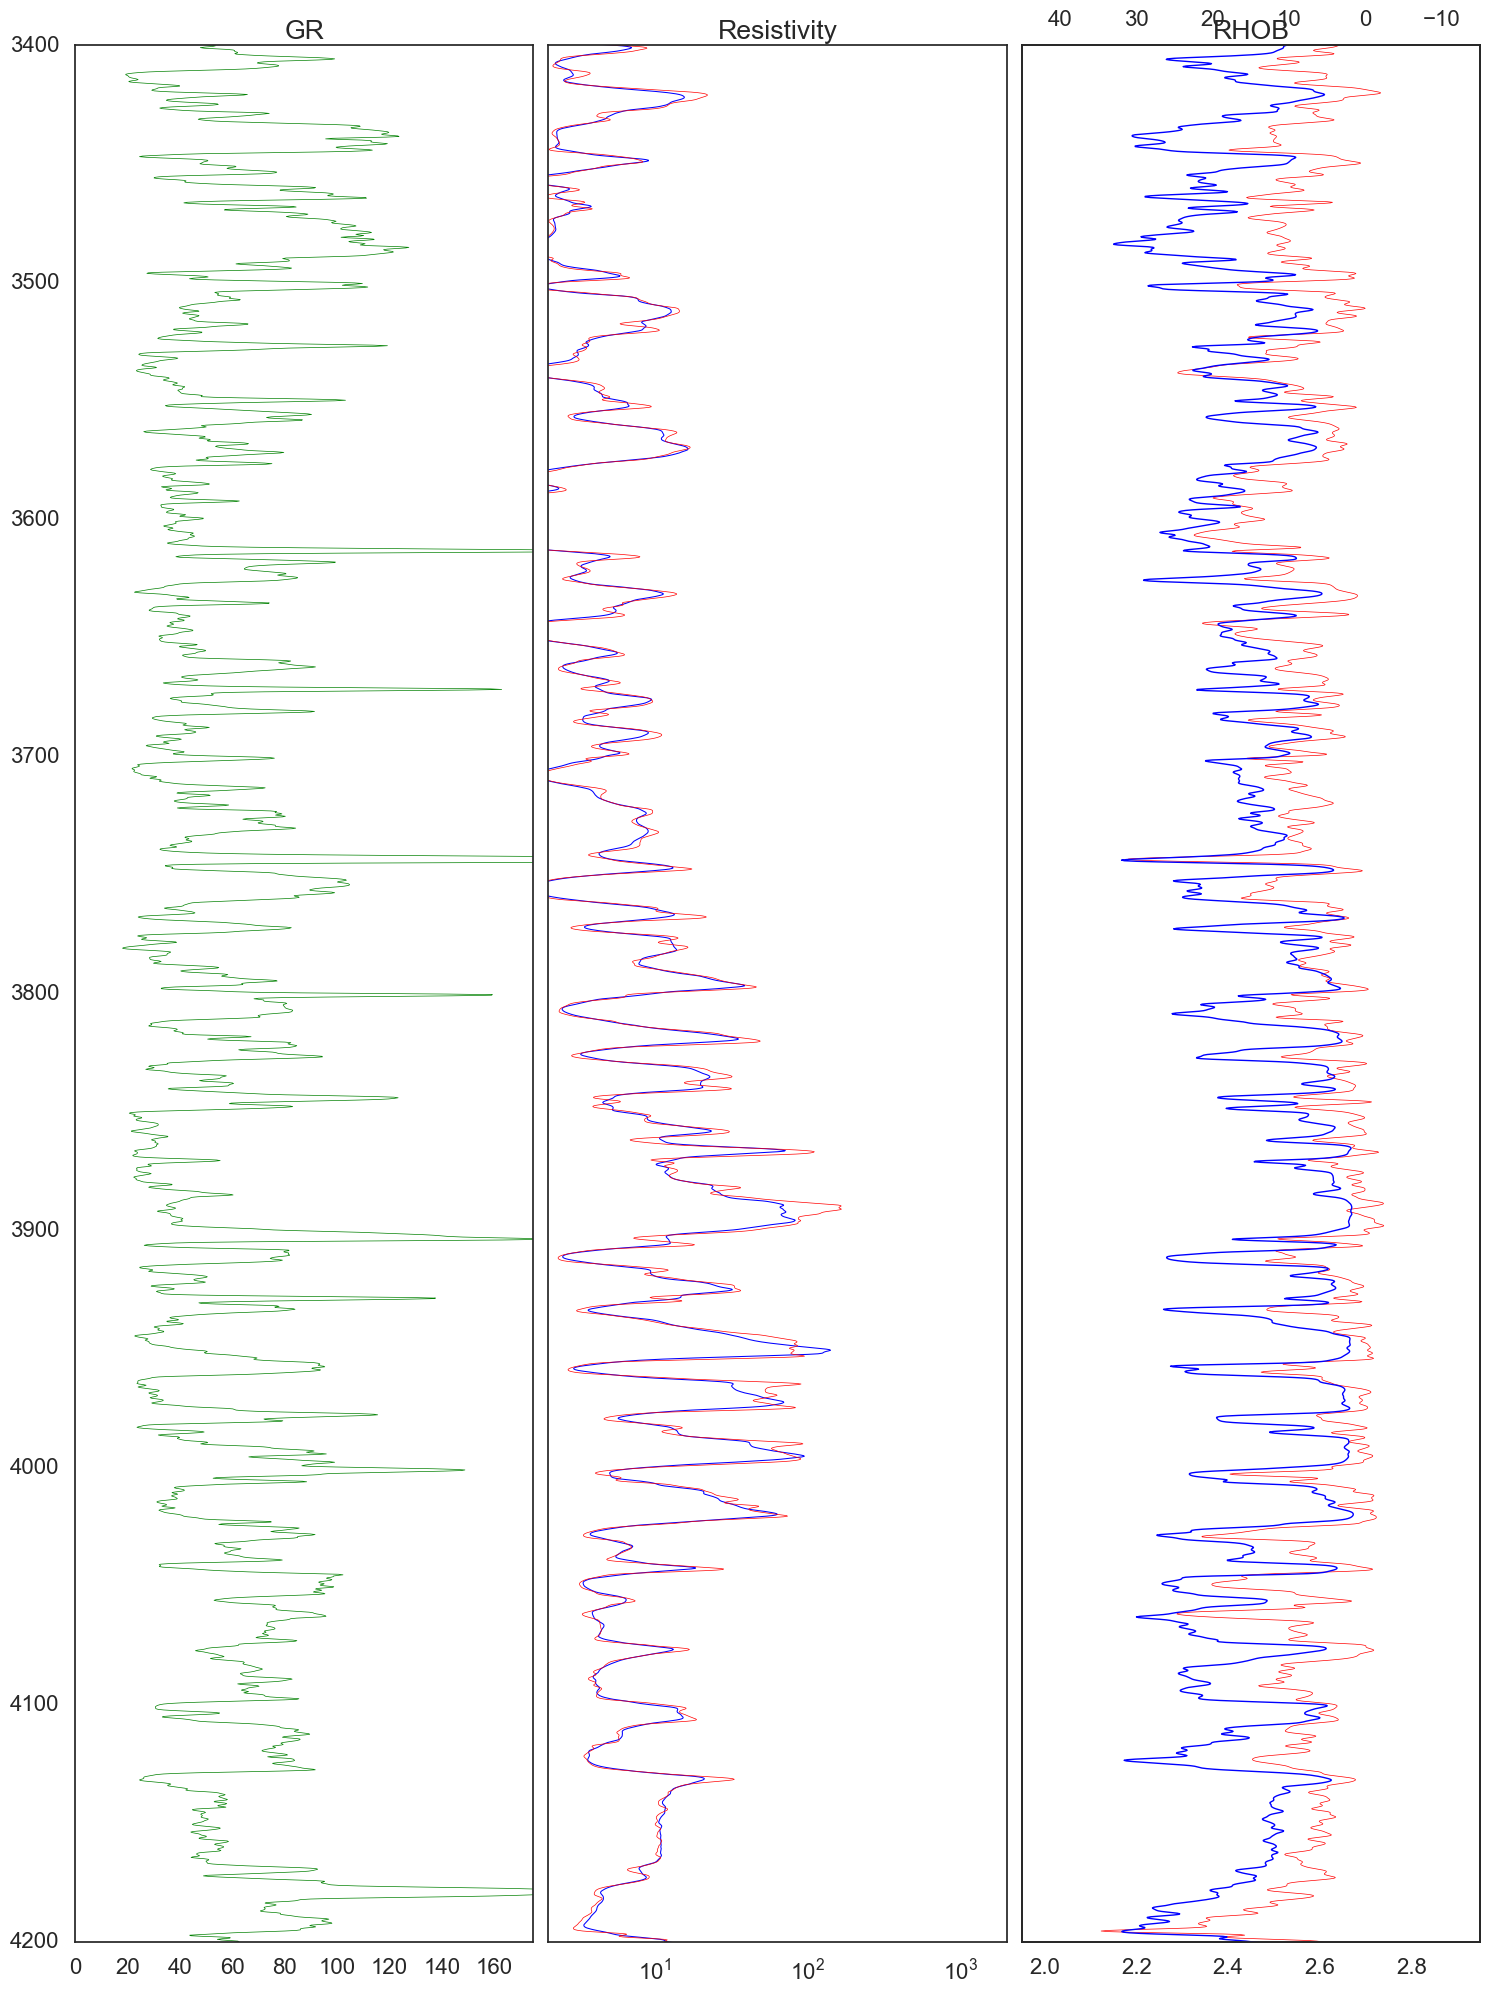

In [42]:
fig = plt.figure(131,figsize=(15,20),dpi=750)
#fig.suptitle('Quick-Look Petrophysics', fontsize=30)


ax1 = fig.add_subplot(131)
ax1.plot(LAS['GR'],LAS['DEPT'],color='g',linewidth=0.5)
#plt.fill_between(LAS['GR'],LAS['Depth'],  10, color='y')
plt.xlim(lower_gr,upper_gr)
plt.ylim(upper_d,lower_d)
plt.title('GR')
plt.gca().invert_yaxis()

ax1 = fig.add_subplot(132)
ax1.plot(LAS['RILD'],LAS['DEPT'],color='b',linewidth=0.75)
plt.xlim(2,2000)
plt.ylim(upper_d,lower_d)
plt.xscale('log')
plt.title('Resistivity')
plt.gca().invert_yaxis()
ax1.yaxis.set_visible(False)


plt.subplot(132)
plt.plot(LAS['RILM'],LAS['DEPT'],color='r',linewidth=0.5)
plt.xlim(2,2000)
plt.ylim(upper_d,lower_d)
plt.xscale('log')
plt.title('Resistivity')
plt.gca().invert_yaxis()


ax1 = fig.add_subplot(133)

ax1.plot(LAS['RHOB'],LAS['DEPT'],color='r',linewidth=0.5)
plt.xlim(lower_rhob,upper_rhob)
plt.ylim(upper_d,lower_d)
plt.title('RHOB')
plt.gca().invert_yaxis()
ax1.yaxis.set_visible(False)

ax2 = ax1.twiny()
ax2.plot(LAS['CNPOR'],LAS['DEPT'],color='b',linewidth=1)
plt.xlim(lower_phi,upper_phi)
plt.ylim(upper_d,lower_d)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
ax2.yaxis.set_visible(False)


plt.tight_layout()

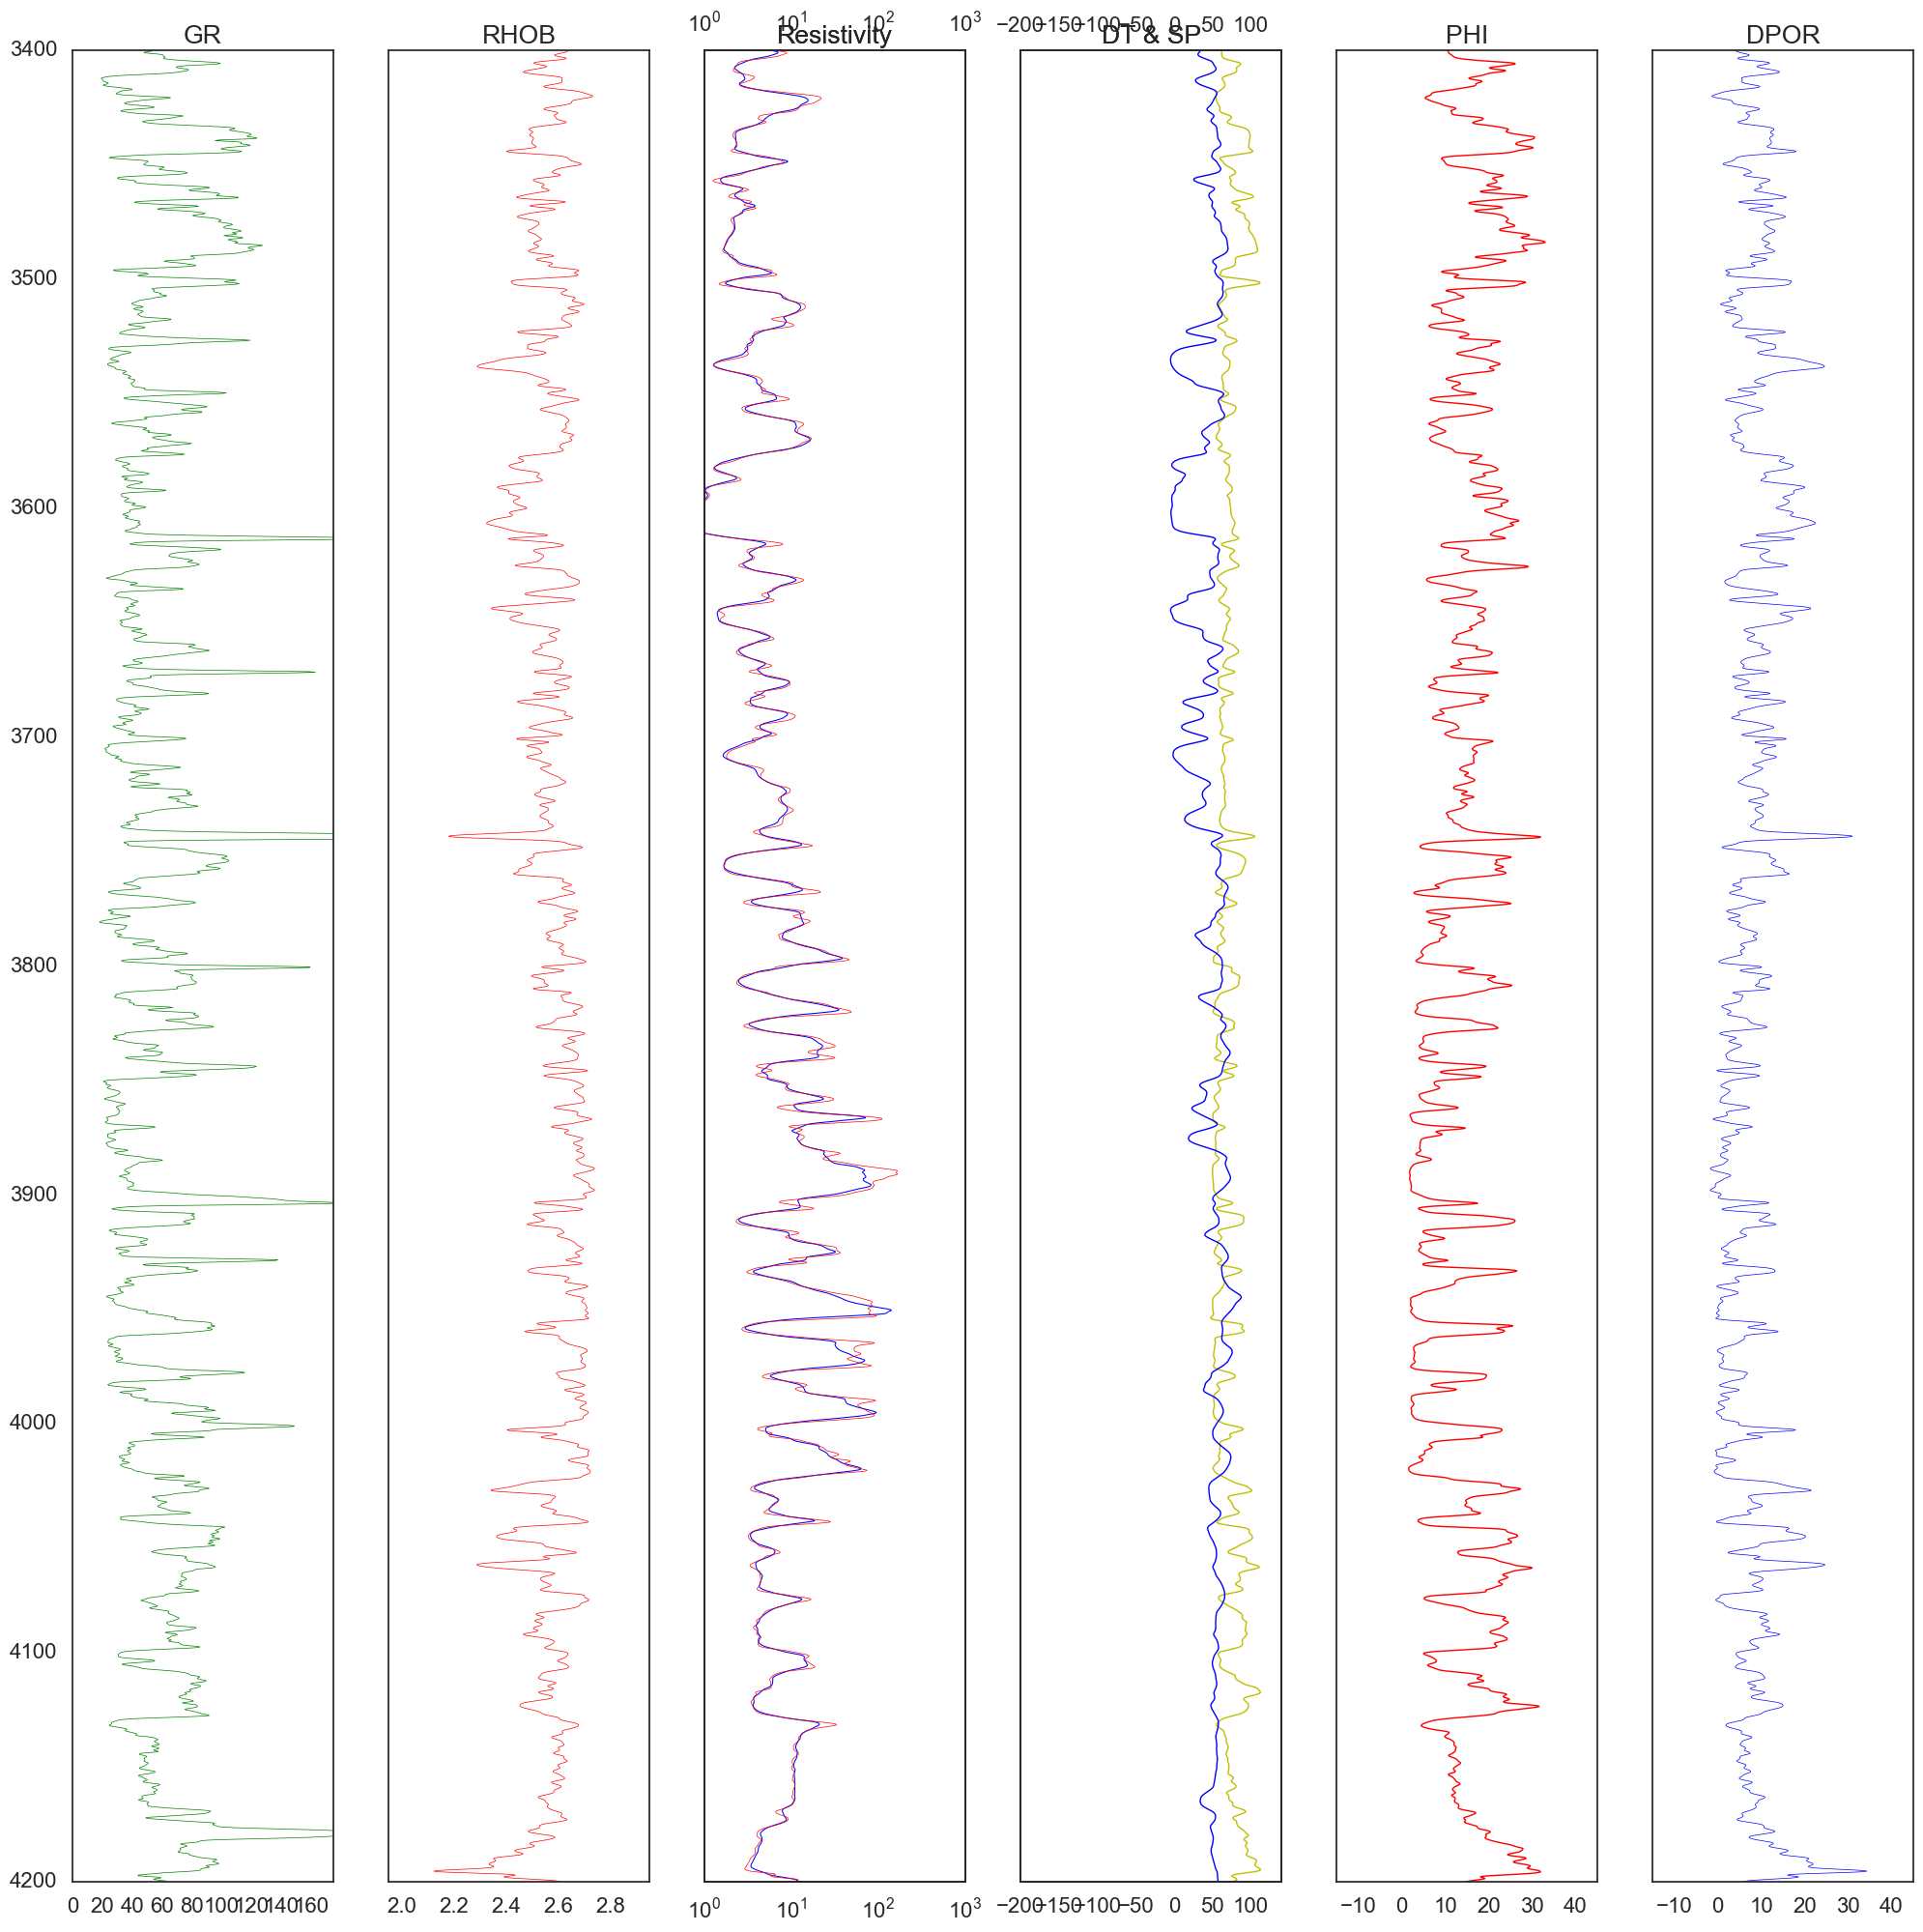

In [37]:
fig = plt.figure(161,figsize=(20,20),dpi=750)
#fig.suptitle('Quick-Look Petrophysics', fontsize=30)


ax1 = fig.add_subplot(161)
ax1.plot(LAS['GR'],LAS['DEPT'],color='g',linewidth=0.5)
#plt.fill_between(LAS['GR'],LAS['Depth'],  10, color='y')
plt.xlim(lower_gr,upper_gr)
plt.ylim(upper_d,lower_d)
plt.title('GR')
plt.gca().invert_yaxis()


ax1 = fig.add_subplot(162)
ax1.plot(LAS['RHOB'],LAS['DEPT'],color='r',linewidth=0.5)
plt.xlim(lower_rhob,upper_rhob)
plt.ylim(upper_d,lower_d)
plt.title('RHOB')
plt.gca().invert_yaxis()
ax1.yaxis.set_visible(False)


ax1 = fig.add_subplot(163)
ax1.plot(LAS['RILD'],LAS['DEPT'],color='b',linewidth=0.75)
plt.xlim(1,1000)
plt.ylim(upper_d,lower_d)
plt.xscale('log')
plt.title('Resistivity')
plt.gca().invert_yaxis()
ax1.yaxis.set_visible(False)

ax2 = ax1.twiny()
ax2.plot(LAS['RILM'],LAS['DEPT'],color='r',linewidth=0.5)
plt.xlim(1,1000)
plt.ylim(upper_d,lower_d)
plt.xscale('log')
plt.title('Resistivity')
plt.gca().invert_yaxis()
ax2.yaxis.set_visible(False)


ax1 = fig.add_subplot(164)
plt.plot(LAS['DT'],LAS['DEPT'],color='y',linewidth=1)
plt.xlim(lower_dt,upper_dt)
plt.ylim(upper_d,lower_d)
plt.title('DT & SP')
plt.gca().invert_yaxis()
ax1.yaxis.set_visible(False)

ax2 = ax1.twiny()
ax2.plot(LAS['SP'],LAS['DEPT'],color='b',linewidth=1)
plt.xlim(lower_dt,upper_dt)
plt.ylim(upper_d,lower_d)
plt.title('DT & SP')
plt.gca().invert_yaxis()
ax2.yaxis.set_visible(False)


ax1 = fig.add_subplot(165)
ax1.plot(LAS['CNPOR'],LAS['DEPT'],color='r',linewidth=1)
plt.xlim(lower_phi,upper_phi)
plt.ylim(upper_d,lower_d)
plt.title('PHI')
plt.gca().invert_yaxis()
ax1.yaxis.set_visible(False)


ax1 = fig.add_subplot(166)
ax1.plot(LAS['DPOR'],LAS['DEPT'],color='b',linewidth=0.5)
plt.xlim(lower_phi,upper_phi)
plt.ylim(upper_d,lower_d)
plt.title('DPOR')
plt.gca().invert_yaxis()
ax1.yaxis.set_visible(False)


plt.tight_layout()